A summary of this notebook.

In [1]:
#| label: importing-libraries
#| echo: false
#| output: false
#| warning: false

import tomlkit
import scanpy as sc
import anndata as ad

import numpy as np
import pandas as pd
import itables

import seaborn as sns
import matplotlib.pyplot as plt

from typing import List, Dict

from IPython.display import display
from os import walk, path, mkdir, listdir, cpu_count
import session_info
import logging

logging.basicConfig(level=logging.ERROR)
sc.set_figure_params(dpi = 100, dpi_save = 300, format= "png")
sc.settings.n_jobs = int(cpu_count() * 0.8)

In [2]:
#| label: defining-parameters
#| echo: true
#| output: false
#| warning: false

#QC Params
CONCAT_SAMPLES: bool = True         # Concatenate all samples in one object, default: true
CORRECT_AMBIENT_RNA: bool = True   # Correct ambient RNA, uses DecontX, Currently causes multiple erros.
FILTER_DOUBLETS: bool = True       # Filter doublets using Scrublet
CELL_CYCLE_SCORE: bool = True       # Calculate cell cycle scores, based on scanpy implementation.
REGRESS: bool = False               # Regress out unwanted variables. Not recommended.

In [3]:
#| label: load-config.toml
#| echo: false 
#| output: false
#| warning: false

## Pipeline parameters
with open("../config.toml", "r") as f:
    config = tomlkit.parse(f.read())

#Directories 
ROOT_DIR = config["basic"]["ANALYSIS_DIR"]
DIR_SAVE = path.join(ROOT_DIR, config["basic"]["DIR_SAVE"])
DIR_samples = config["basic"]["DIR_SAMPLES"]

#Basic information
TECHNOLOGY: str = config["basic"]["TECHNOLOGY"]
ORGANISM: str = config["basic"]["ORGANISM"]
AUTODISCOVER: bool = config["basic"]["auto_find"]
samples: Dict[str, str] = config["basic"]["samples"]

# Heading level 1

## Showing itable

In [4]:
#| warning: false
# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
    'Age': [25, 30, 35, 40, 45],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Boston']
}
df = pd.DataFrame(data)
itables.show(df)

## Generate tabsets with figures programmatically

::: {.panel-tabset}

### Tab 1

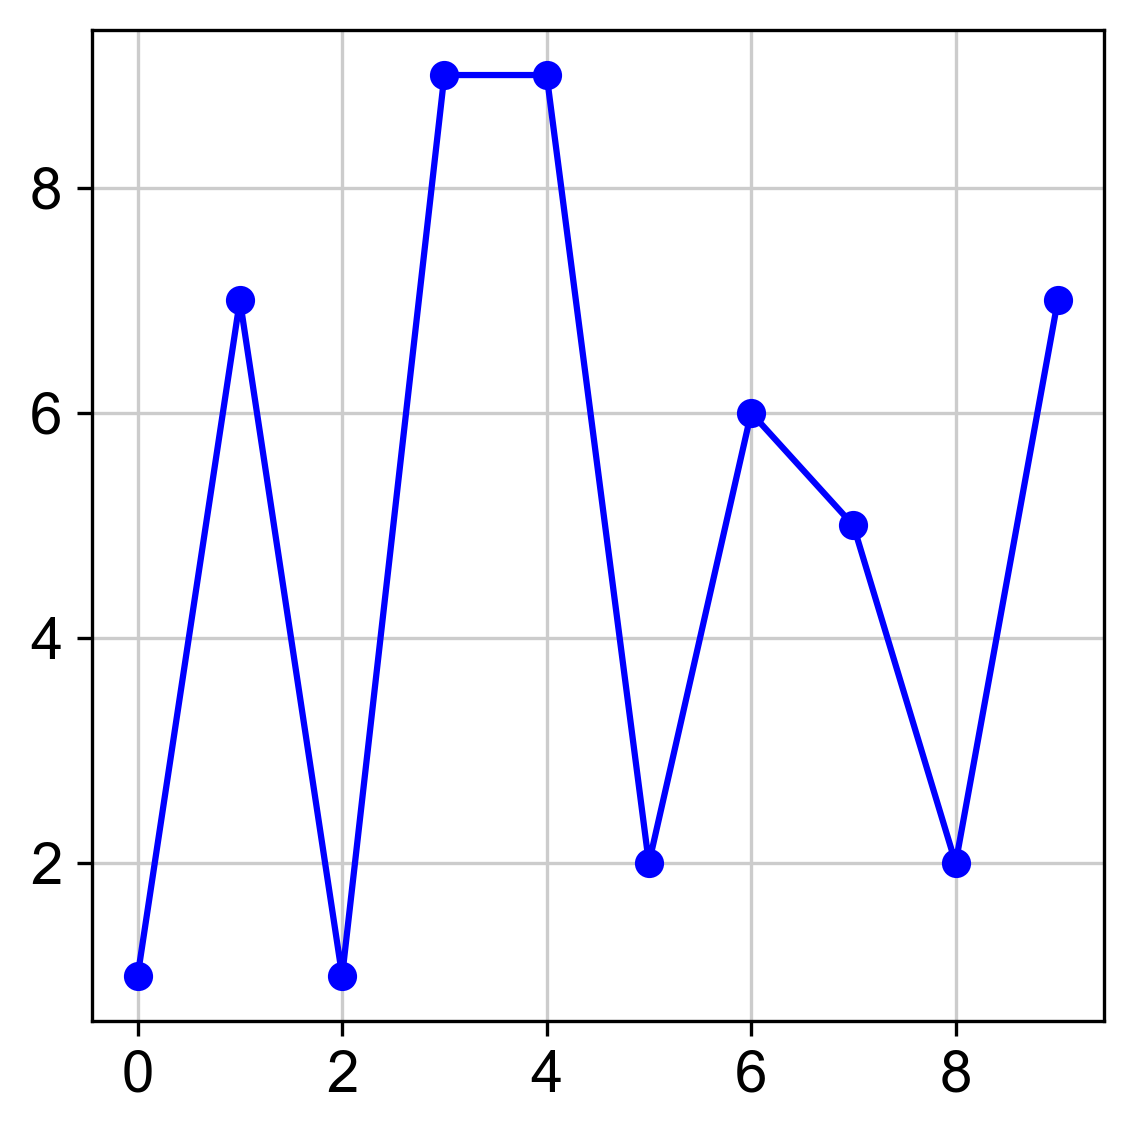

### Tab 2

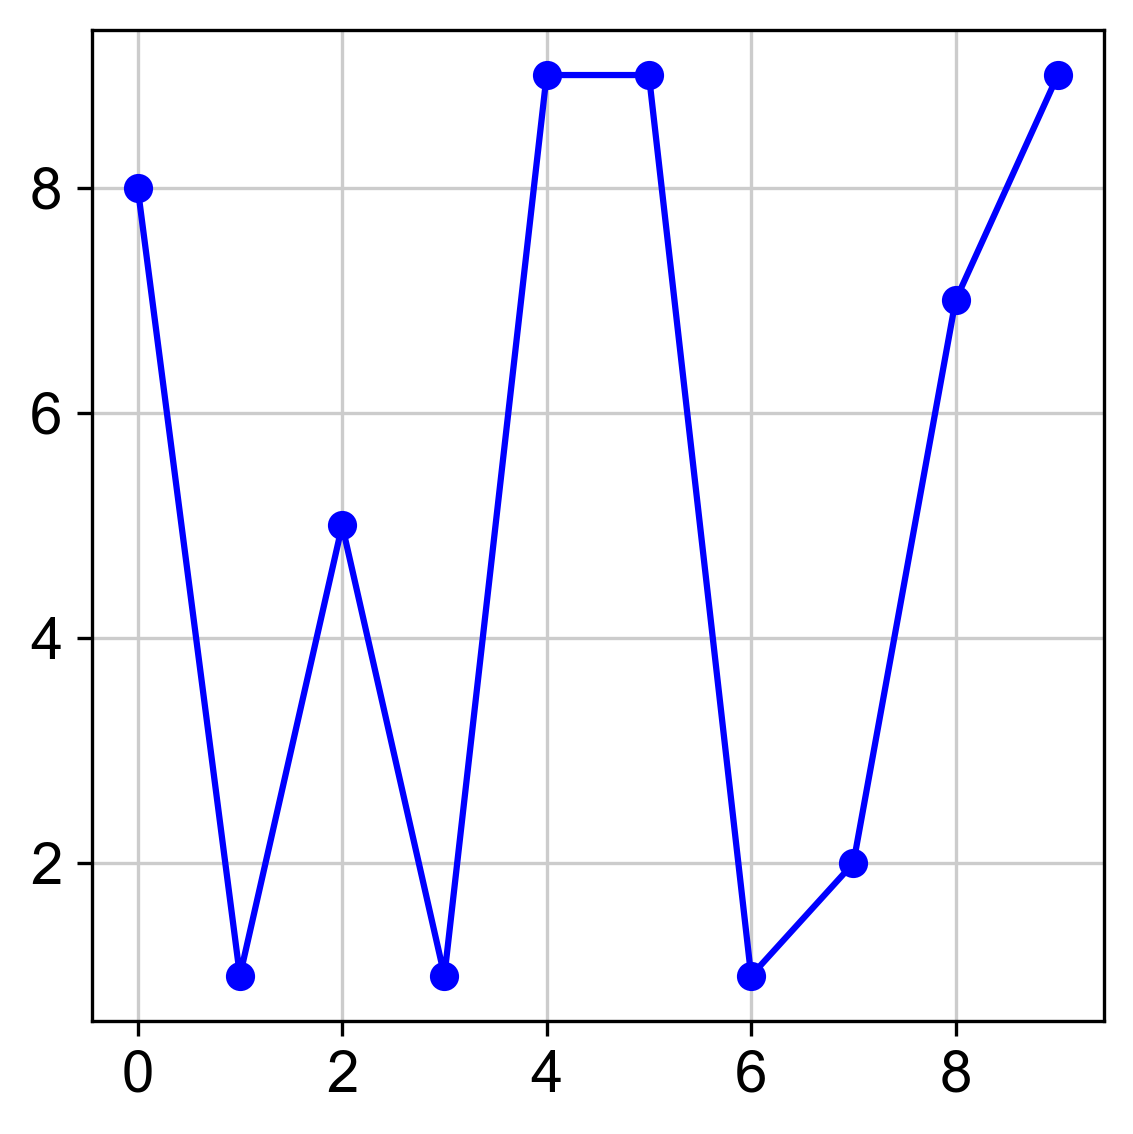

### Tab 3

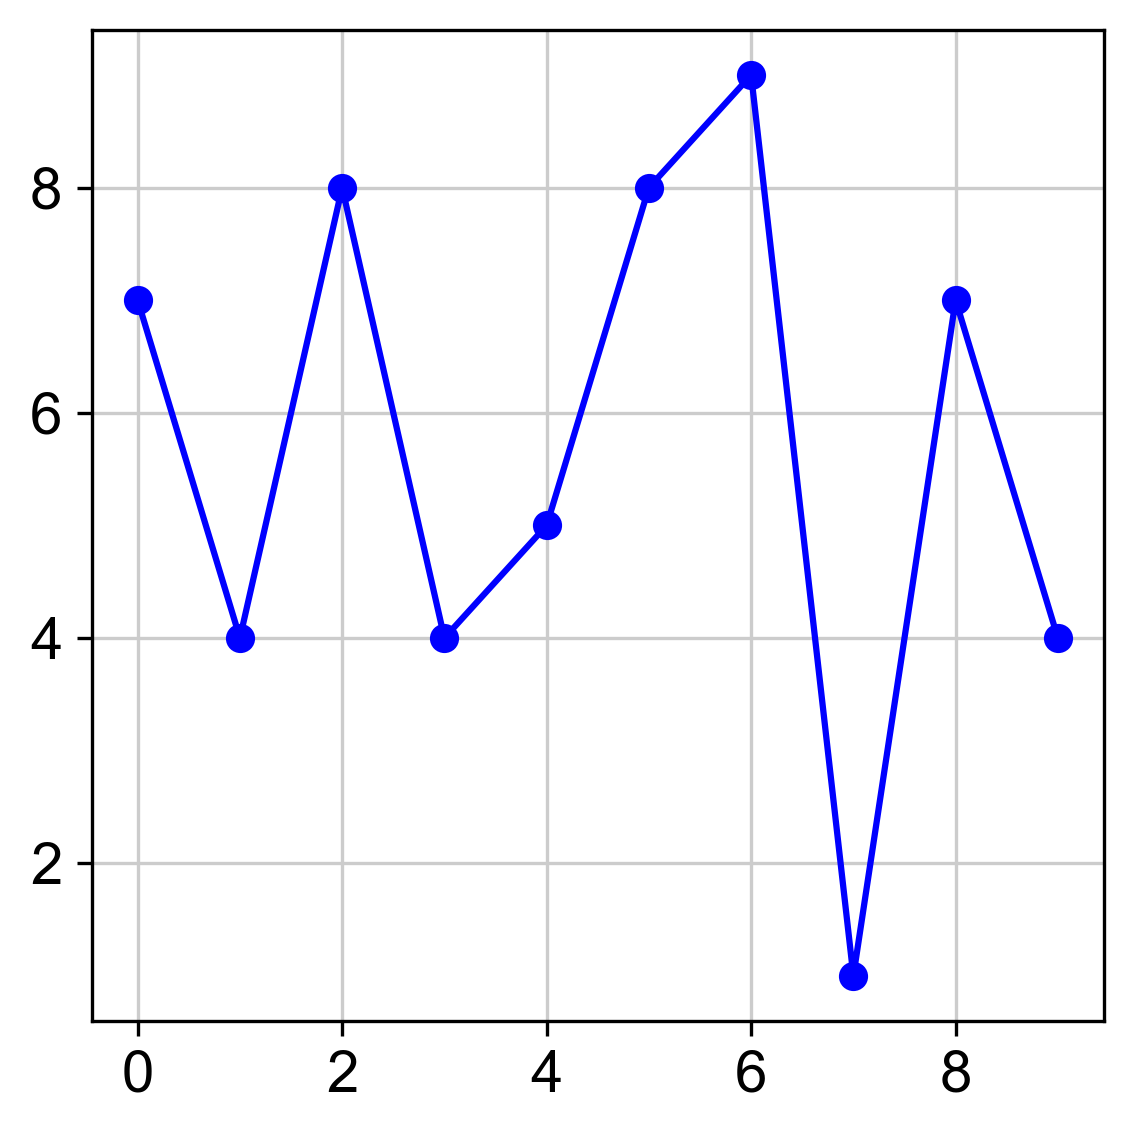

### Tab 4

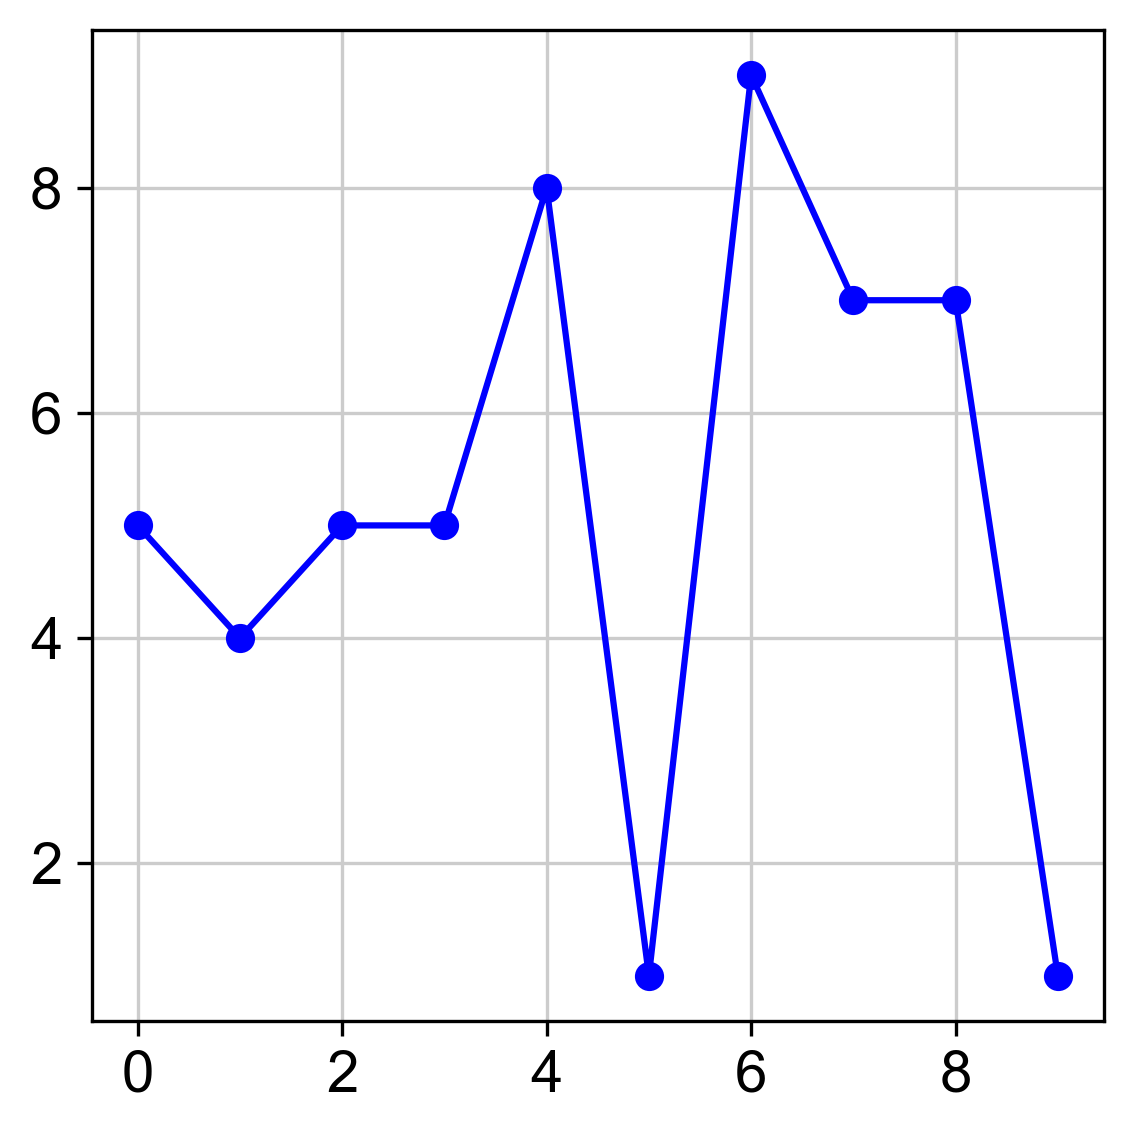

:::


In [5]:
import ipywidgets as widgets
from IPython.display import Markdown, display
import io
import base64

quarto_markdown = "::: {.panel-tabset}\n\n"

for i in range(4):
    tab_label = f"Tab {i+1}"
    text_fig = f"Figure for Tab {i+1}"
    # Create a new figure
    plt.figure()
    # Generate random data
    x = np.arange(0, 10, 1)  # Array from 0 to 9 (10 elements)
    y = np.random.randint(1, 10, size=10)  # Array of 10 random integers between 1 and 10
    plt.plot(x, y, marker='o', linestyle='-', color='b', label='Data')  # Plot x vs y with markers and line
    plt.tight_layout()
    # Save the plot to a buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    plt.close()
    # Encode the image to base64
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    # Add the image to the markdown
    quarto_markdown += f"### {tab_label}\n\n![{text_fig}](data:image/png;base64,{img_str})\n\n"

quarto_markdown += ":::\n"
# Display the generated markdown
display(Markdown(quarto_markdown))

# Session Information

In [6]:
session_info.show()